In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Activation
from keras.layers import Conv2D, MaxPooling2D,TimeDistributed, Concatenate, Conv3D, MaxPooling3D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import cv2
import os

In [5]:
# load the .avi file

boxing_avi_list = []
handclapping_avi_list = []
handwaving_avi_list = []

# load the .avi file in the boxing folder
for filename in os.listdir('boxing'):
    boxing_avi_list.append(cv2.VideoCapture('boxing/'+filename))

# load the .avi file in the handclapping folder
for filename in os.listdir('handclapping'):
    handclapping_avi_list.append(cv2.VideoCapture('handclapping/'+filename))

# load the .avi file in the handwaving folder
for filename in os.listdir('handwaving'):
    handwaving_avi_list.append(cv2.VideoCapture('handwaving/'+filename))

print('boxing_avi_list length: ', len(boxing_avi_list))
print('handclapping_avi_list length: ', len(handclapping_avi_list))
print('handwaving_avi_list length: ', len(handwaving_avi_list))

shortest_boxing_video = int(min([avi.get(cv2.CAP_PROP_FRAME_COUNT) for avi in boxing_avi_list]))
shortest_handclapping_video = int(min([avi.get(cv2.CAP_PROP_FRAME_COUNT) for avi in handclapping_avi_list]))
shortest_handwaving_video = int(min([avi.get(cv2.CAP_PROP_FRAME_COUNT) for avi in handwaving_avi_list]))

print("\nshortest boxing video: ", shortest_boxing_video)
print("shortest handclapping video: ", shortest_handclapping_video)
print("shortest handwaving video: ", shortest_handwaving_video)

FileNotFoundError: ignored

In [6]:
# convert the .avi file to .numpy array as grayscale frames
def avi2np(avi):
    
    frames = []
    while True:
        ret, frame = avi.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame)

    return np.array(frames)

In [7]:
frames_per_video = 20

# for each video take 10 frames randomly
boxing = np.array([avi2np(avi)[:frames_per_video] for avi in boxing_avi_list])
handclapping = np.array([avi2np(avi)[:frames_per_video] for avi in handclapping_avi_list])
handwaving = np.array([avi2np(avi)[:frames_per_video] for avi in handwaving_avi_list])

print("boxing shape: ", boxing.shape)
print("handclapping shape: ", handclapping.shape)
print("handwaving shape: ", handwaving.shape)

boxing shape:  (0,)
handclapping shape:  (0,)
handwaving shape:  (0,)


In [ ]:
# Save the numpy array
#np.save('boxing.npy', boxing)
#np.save('handclapping.npy', handclapping)
#np.save('handwaving.npy', handwaving)

In [8]:
# Load the numpy array

boxing = np.load('boxing.npy')
handclapping = np.load('handclapping.npy')
handwaving = np.load('handwaving.npy')

print("boxing shape: ", boxing.shape)
print("handclapping shape: ", handclapping.shape)
print("handwaving shape: ", handwaving.shape)

boxing shape:  (100, 20, 120, 160)
handclapping shape:  (99, 20, 120, 160)
handwaving shape:  (100, 20, 120, 160)


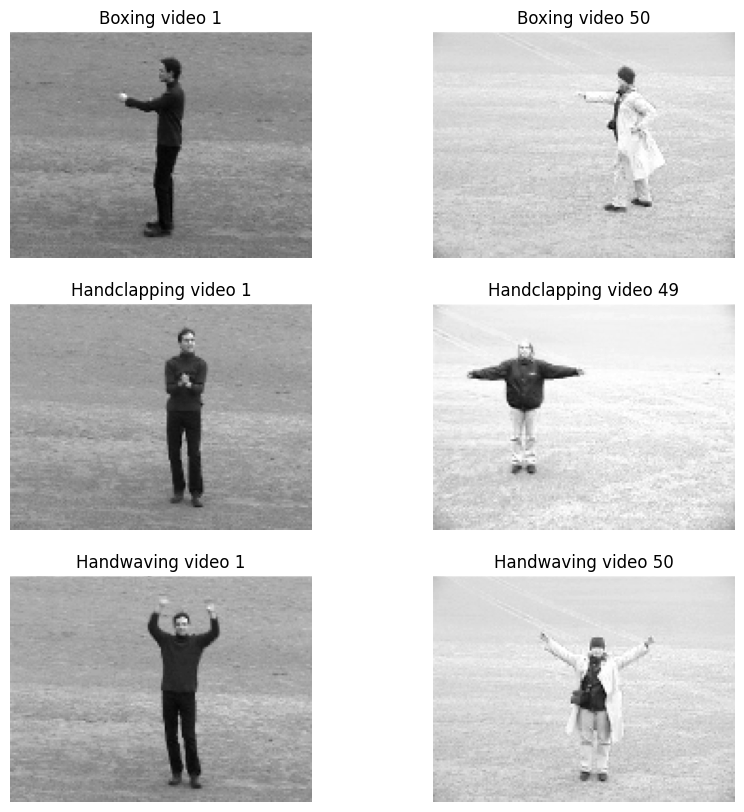

In [9]:
# Display 2 frames from a video clips from each class.
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(boxing[0][10], cmap='gray')
plt.title('Boxing video 1')
plt.axis('off')
plt.subplot(3, 2, 2)
plt.imshow(boxing[int(len(boxing)/2)][10], cmap='gray')
plt.title('Boxing video ' + str(int(len(boxing)/2)))
plt.axis('off')
plt.subplot(3, 2, 3)
plt.imshow(handclapping[0][10], cmap='gray')
plt.title('Handclapping video 1')
plt.axis('off')
plt.subplot(3, 2, 4)
plt.imshow(handclapping[int(len(handclapping)/2)][10], cmap='gray')
plt.title('Handclapping video ' + str(int(len(handclapping)/2)))
plt.axis('off')
plt.subplot(3, 2, 5)
plt.imshow(handwaving[0][10], cmap='gray')
plt.title('Handwaving video 1')
plt.axis('off')
plt.subplot(3, 2, 6)
plt.imshow(handwaving[int(len(handwaving)/2)][10], cmap='gray')
plt.title('Handwaving video ' + str(int(len(handwaving)/2)))
plt.axis('off')
plt.show()


In [10]:
# generate x-frame samples
def generate_x_frame_samples(data, frames_per_video):
    
    x_frame_samples = []
    for i in range(len(data)):
        for j in range(len(data[i]) - frames_per_video + 1):
            x_frame_samples.append(data[i][j:j+frames_per_video])
    return np.array(x_frame_samples)

In [ ]:
nb_x_frames = 2

boxing_x_frame_samples = generate_x_frame_samples(boxing, nb_x_frames)
print("boxing_x_frame_samples shape: ", boxing_x_frame_samples.shape)

handclapping_x_frame_samples = generate_x_frame_samples(handclapping, nb_x_frames)
print("handclapping_x_frame_samples shape: ", handclapping_x_frame_samples.shape)

handwaving_x_frame_samples = generate_x_frame_samples(handwaving, nb_x_frames)
print("handwaving_x_frame_samples shape: ", handwaving_x_frame_samples.shape)

boxing_x_frame_samples shape:  (1900, 2, 120, 160)
handclapping_x_frame_samples shape:  (1881, 2, 120, 160)
handwaving_x_frame_samples shape:  (1900, 2, 120, 160)


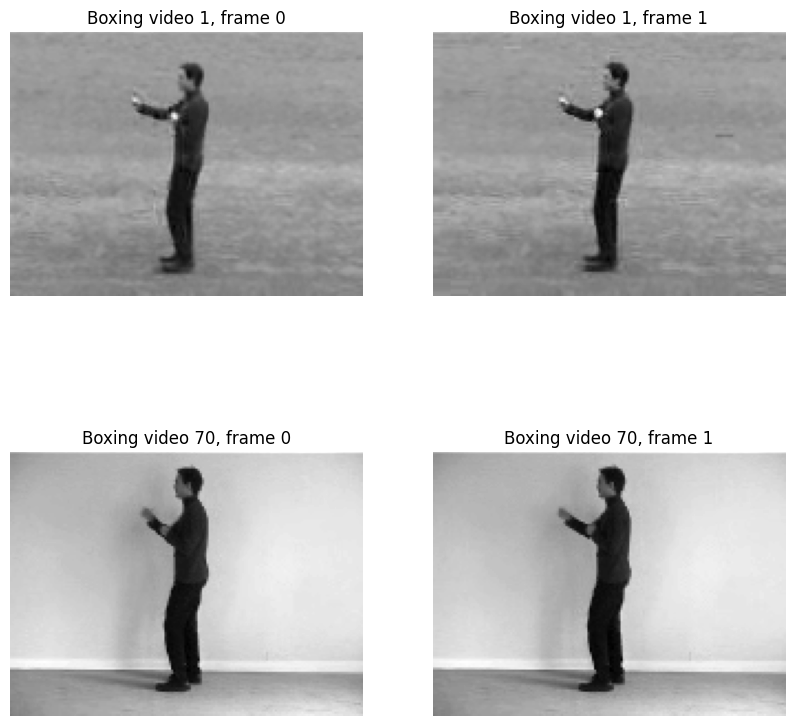

In [ ]:
# Display the first 2 frames of the first 2 boxing_x_frame_samples
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(boxing_x_frame_samples[2][0], cmap='gray')
plt.title('Boxing video 1, frame 0')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(boxing_x_frame_samples[2][1], cmap='gray')
plt.title('Boxing video 1, frame 1')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(boxing_x_frame_samples[70][0], cmap='gray')
plt.title('Boxing video 70, frame 0')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(boxing_x_frame_samples[70][1], cmap='gray')
plt.title('Boxing video 70, frame 1')
plt.axis('off')
plt.show()

In [ ]:
def split_train_test(data, train_test_ratio):
    train_size = int(len(data) * train_test_ratio)
    return data[:train_size], data[train_size:]

def create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio):
    train_boxing, test_boxing = split_train_test(boxing_x_frame_samples, train_test_ratio)
    train_handclapping, test_handclapping = split_train_test(handclapping_x_frame_samples, train_test_ratio)
    train_handwaving, test_handwaving = split_train_test(handwaving_x_frame_samples, train_test_ratio)

    X_train = np.concatenate((train_boxing, train_handclapping, train_handwaving))
    X_test = np.concatenate((test_boxing, test_handclapping, test_handwaving))

    y_train = np.array([0]*len(train_boxing) + [1]*len(train_handclapping) + [2]*len(train_handwaving))
    y_test = np.array([0]*len(test_boxing) + [1]*len(test_handclapping) + [2]*len(test_handwaving))

    # add an extra dimension for the grayscale channel
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

    # Shuffle the data
    idx = np.random.permutation(len(X_train))
    X_train, y_train = X_train[idx], y_train[idx]

    return X_train, X_test, y_train, y_test

train_test_ratio = 0.9


X_train, X_test, y_train, y_test = create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio)

print("\nX_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (5112, 2, 120, 160, 1)
X_test shape:  (569, 2, 120, 160, 1)
y_train shape:  (5112,)
y_test shape:  (569,)


In [ ]:
optimizer_type = Adam(learning_rate=5e-5)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.5  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 100  # maxmimum number of epochs to be iterated
batch_size = 50   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 32 # number of nodes in hidden fully connected layer
num_back_nodes = 32

nb_classes = 3

In [ ]:
def conv_layer(input, filters=4, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'):
    conv = TimeDistributed( Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation='relu') )(input) 
    return TimeDistributed( Activation(activation) )(conv)

In [ ]:
# TODO : CHANGE STRUCTURE OF THE MODEL

input_shape = (2, 120, 160, 1)
inputs = Input(shape=input_shape)

conv1 = conv_layer(inputs, filters=4)
pool1 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv1)   # maxpool downsampled to 60x80x4

conv2 = conv_layer(pool1, filters=8)
pool2 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv2)   # maxpool downsampled to 30x40x8

conv3 = conv_layer(pool2, filters=16)
pool3 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv3)   # maxpool downsampled to 15x20x16

flatten = TimeDistributed( Flatten() )(pool3)   

dense_01 = TimeDistributed(Dropout(dropout_ratio))(flatten)
dense_01 = TimeDistributed(Dense(num_hidden_nodes))(dense_01)
dense_01 = TimeDistributed(Activation('sigmoid'))(dense_01)

concat= Concatenate(axis=1)([ dense_01[:,0,:],dense_01[:,1,:] ])

dense_02 = Dense(nb_classes)(concat)
outputs = Activation('softmax')(dense_02)


* Compiling the network model *

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2, 120, 160  0           []                               
                                , 1)]                                                             
                                                                                                  
 time_distributed_13 (TimeDistr  (None, 2, 120, 160,  40         ['input_2[0][0]']                
 ibuted)                         4)                                                               
                                                                                                  
 time_distributed_14 (TimeDistr  (None, 2, 120, 160,  0          ['time_distributed_13[0][0]']    
 ibuted)                         4)                       

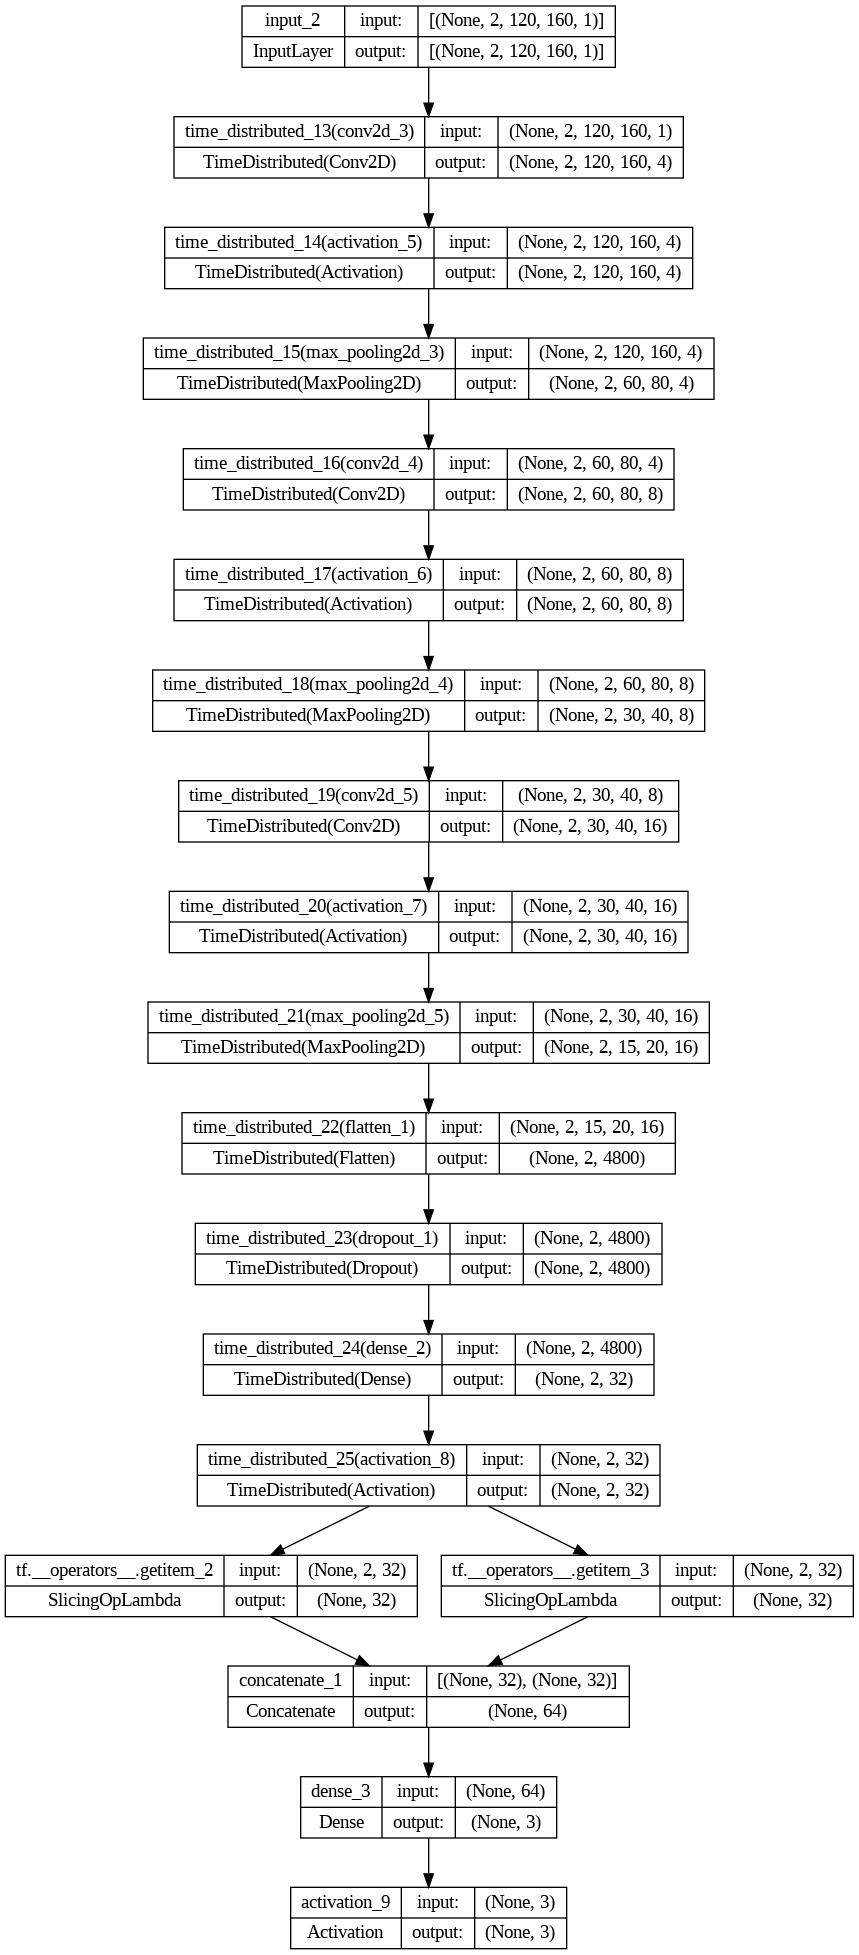

In [ ]:
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

In [ ]:
# Train your network from scratch at least 5 times and report the average and standard deviation of your test accuracies

evaluated_models = []

first_run = False
for i in range(1):
    print('Training iteration: ', i+1)
    print()
    tf.keras.backend.clear_session()

    if not first_run:
      del model
      first = False

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    history = model.fit(X_train, tf.keras.utils.to_categorical(y_train, nb_classes), batch_size=batch_size, epochs=max_epochs, validation_split=validtrain_split_ratio, shuffle=batch_shuffle)
    print()
    print('Training accuracy: ', history.history['categorical_accuracy'][-1])
    print('Validation accuracy: ', history.history['val_categorical_accuracy'][-1])
    print('Test accuracy: ', model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes))[1])
    print()
    evaluated_models.append(model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes)))


Training iteration:  1

Epoch 1/100
82/82 [==============================] - 3s 23ms/step - loss: 1.2077 - categorical_accuracy: 0.3343 - val_loss: 1.1271 - val_categorical_accuracy: 0.3412
Epoch 2/100
82/82 [==============================] - 1s 18ms/step - loss: 1.1494 - categorical_accuracy: 0.3473 - val_loss: 1.1013 - val_categorical_accuracy: 0.3460
Epoch 3/100
82/82 [==============================] - 1s 17ms/step - loss: 1.1264 - categorical_accuracy: 0.3402 - val_loss: 1.1047 - val_categorical_accuracy: 0.3226
Epoch 4/100
82/82 [==============================] - 1s 16ms/step - loss: 1.1124 - categorical_accuracy: 0.3505 - val_loss: 1.0933 - val_categorical_accuracy: 0.3284
Epoch 5/100
82/82 [==============================] - 1s 17ms/step - loss: 1.1101 - categorical_accuracy: 0.3588 - val_loss: 1.0903 - val_categorical_accuracy: 0.3451
Epoch 6/100
82/82 [==============================] - 1s 17ms/step - loss: 1.1108 - categorical_accuracy: 0.3483 - val_loss: 1.1003 - val_categoric

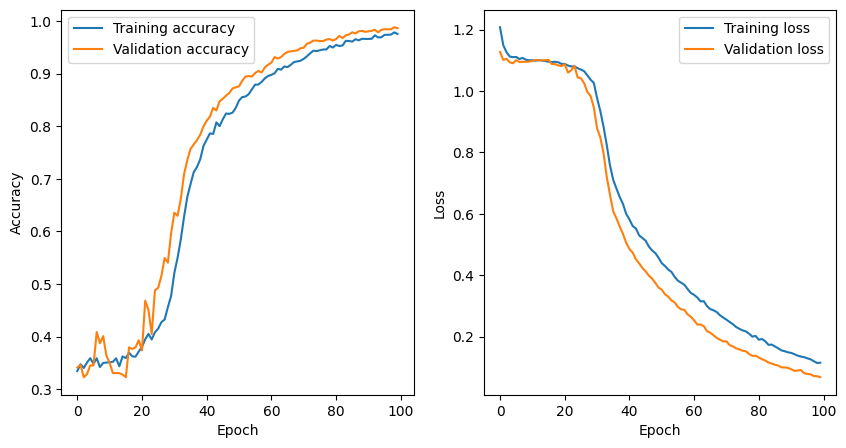

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
print('Average test accuracy: ', np.mean([i[1] for i in evaluated_models]))
print('Standard deviation of test accuracy: ', np.std([i[1] for i in evaluated_models]))

Average test accuracy:  0.6801406145095825
Standard deviation of test accuracy:  0.0


18/18 [==============================] - 0s 3ms/step
[[125  18  47]
 [ 23 132  34]
 [ 20  40 130]]


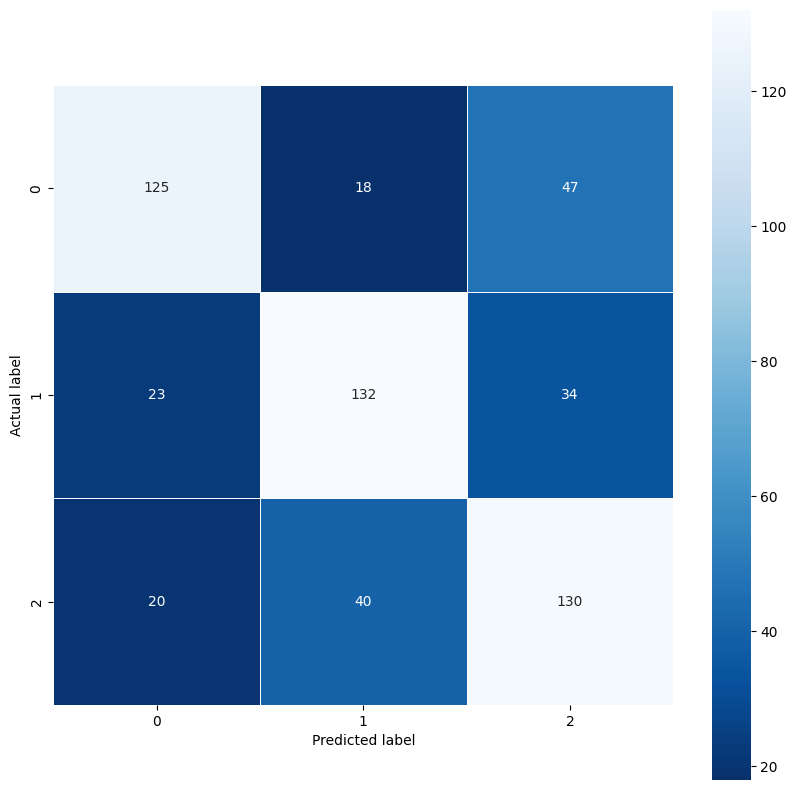

In [ ]:
# Print the confusion matrix for the last model

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(tf.keras.utils.to_categorical(y_test, nb_classes), axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix for the last model

plt.figure(figsize=(10, 10))

sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


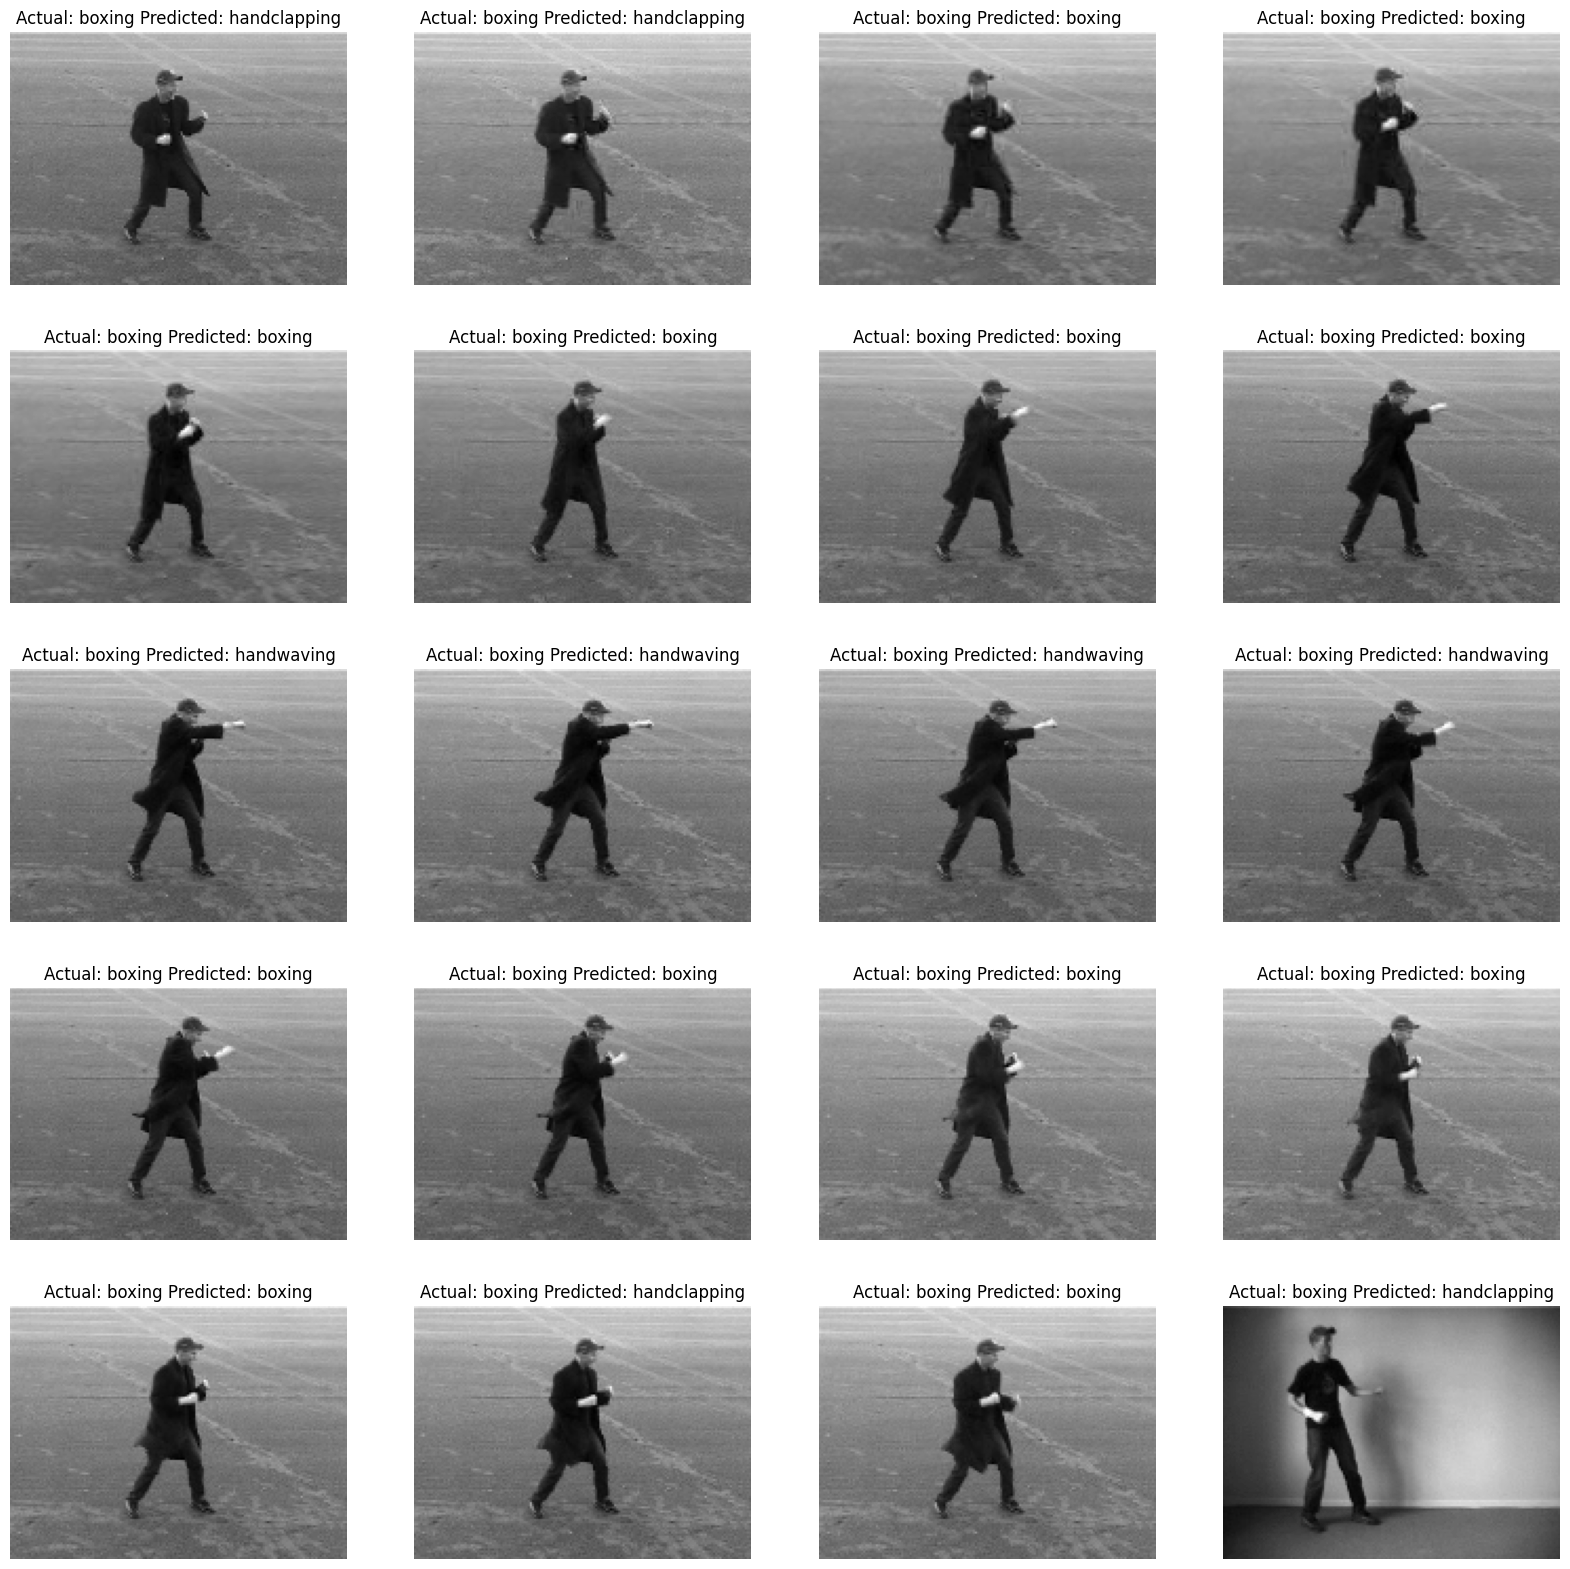

In [ ]:
# Display the test images with the predicted and actual labels

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
name_dict = {0: 'boxing', 1: 'handclapping', 2: 'handwaving'}

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(X_test[i, 0, :, :, 0], cmap='gray')
    plt.title('Actual: ' + name_dict[y_test[i]] + ' Predicted: ' + name_dict[y_pred[i]])
    plt.axis('off')

plt.show()

In [ ]:
def create_model():
    input_shape = (2, 120, 160, 1)

    inputs = Input(shape=input_shape)

    # Add convolutional layers
    conv2d1 = TimeDistributed(Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), padding='same'))(inputs)
    conv2d1 = TimeDistributed(Activation('relu'))(conv2d1)
    conv2d1 = TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2)))(conv2d1)

    print("cov2d1 shape : ", conv2d1.shape)

    conv2d1 = TimeDistributed(BatchNormalization())(conv2d1)

    conv2d2 = TimeDistributed(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same'))(conv2d1)
    conv2d2 = TimeDistributed(Activation('relu'))(conv2d2)
    conv2d2 = TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2)))(conv2d2)

    print("cov2d2 shape : ", conv2d2.shape)

    conv2d2 = TimeDistributed(BatchNormalization())(conv2d2)

    conv3d1 = Conv3D(filters=4, kernel_size=(2, 3, 3), padding="same")(conv2d2)
    conv3d1 = Activation('relu')(conv3d1)
    conv3d1 = MaxPooling3D(pool_size=(1, 2, 2))(conv3d1)

    print("cov3d1 shape : ", conv3d1.shape)

    conv3d1 = TimeDistributed(BatchNormalization())(conv3d1)
    
    conv2d3 = TimeDistributed(Conv2D(64, kernel_size=(3, 3), activation='relu'))(conv3d1)
    conv2d3 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv2d3)

    print("cov2d3 shape : ", conv2d3.shape)

    conv3d2 = Conv3D(16, kernel_size=(2, 2, 2), activation='relu')(conv2d3)
    conv3d2 = MaxPooling3D(pool_size=(1, 2, 2))(conv3d2)

    conv3d2 = TimeDistributed(BatchNormalization())(conv3d2)

    print("cov3d2 shape : ", conv3d2.shape)

    # Flatten the feature maps
    flatten = TimeDistributed(Flatten())(conv3d2)

    print("flatten shape : ", flatten.shape)

    # Add dense layers
    hidden1 = TimeDistributed(Dense(128, activation='relu'))(flatten)
    hidden1 = TimeDistributed(Dropout(0.5))(hidden1)
    hidden2 = TimeDistributed(Dense(32, activation='relu'))(hidden1)
    hidden2 = TimeDistributed(Dropout(0.3))(hidden2)

    print("hidden2 shape : ", hidden2.shape)

    output = Dense(3)(hidden2)
    output = Activation('softmax')(output)
    output = Flatten()(output)

    model = Model(inputs, output)

    return model


* Compiling the network model *

cov2d1 shape :  (None, 2, 60, 80, 4)
cov2d2 shape :  (None, 2, 30, 40, 8)
cov3d1 shape :  (None, 2, 15, 20, 4)
cov2d3 shape :  (None, 2, 6, 9, 64)
cov3d2 shape :  (None, 1, 2, 4, 16)
flatten shape :  (None, 1, 128)
hidden2 shape :  (None, 1, 32)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 120, 160, 1)]  0         
                                                                 
 time_distributed (TimeDistr  (None, 2, 120, 160, 4)   40        
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 2, 120, 160, 4)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 2, 60, 8

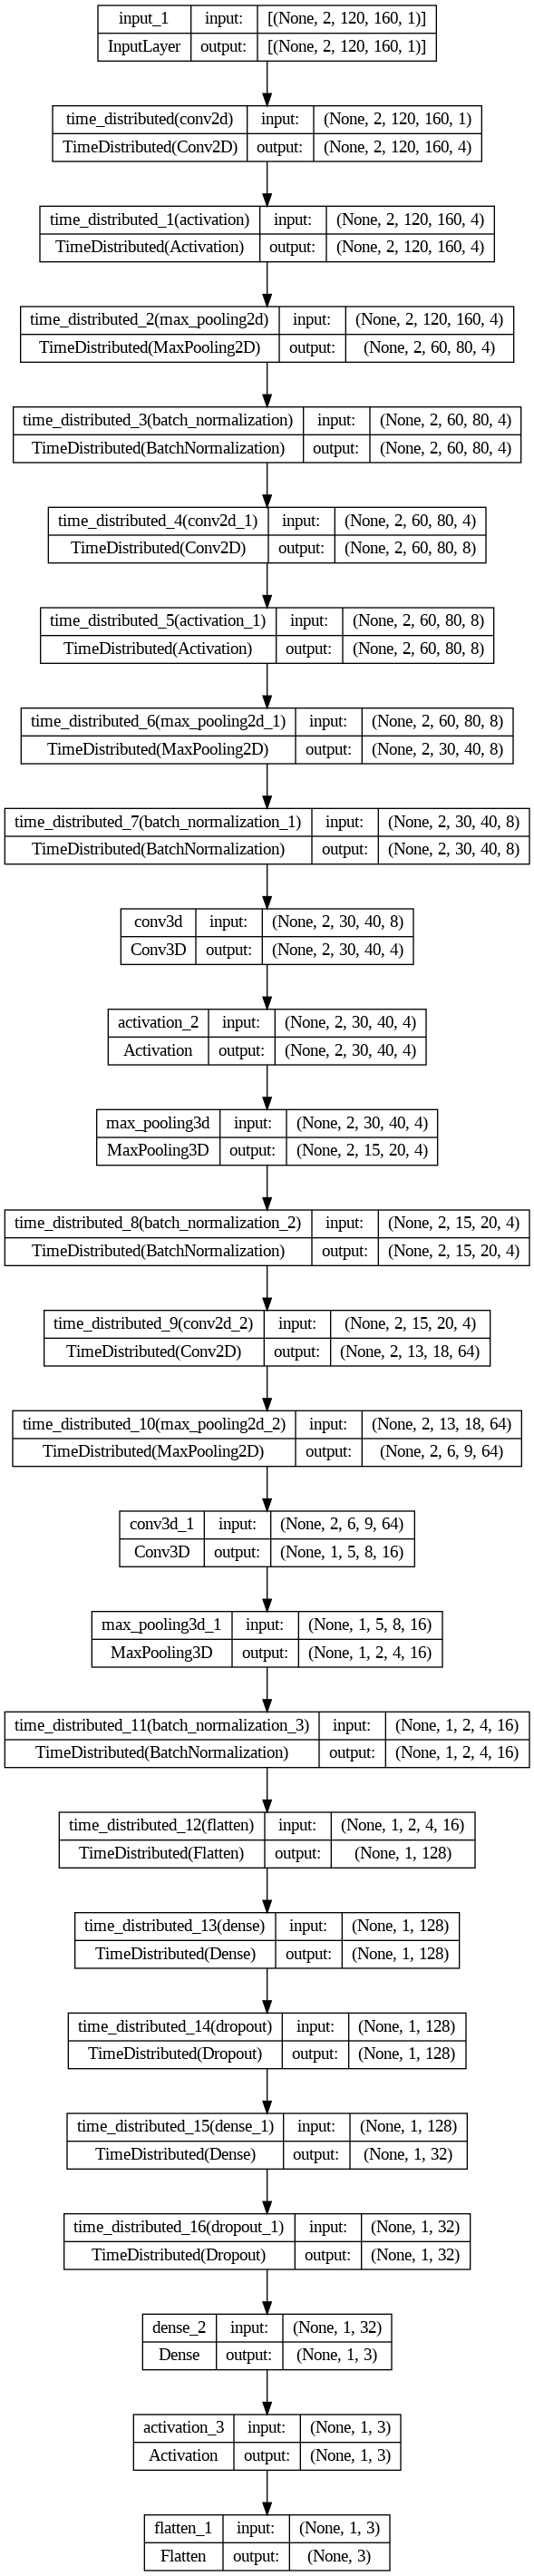

In [ ]:
print()
print('* Compiling the network model *')
print()

model = create_model()  # create the model
model.compile(loss=loss, optimizer=optimizer_type, metrics=metrics)  # compile the model

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

In [ ]:
max_epochs = 50

history = model.fit(X_train, tf.keras.utils.to_categorical(y_train, nb_classes), batch_size=batch_size, epochs=max_epochs, validation_split=validtrain_split_ratio, shuffle=batch_shuffle)
print()
print('Training accuracy: ', history.history['categorical_accuracy'][-1])
print('Validation accuracy: ', history.history['val_categorical_accuracy'][-1])
print('Test accuracy: ', model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes))[1])
print()

Epoch 1/50
82/82 [==============================] - 3s 31ms/step - loss: 0.3217 - categorical_accuracy: 0.8689 - val_loss: 0.3021 - val_categorical_accuracy: 0.8886
Epoch 2/50
82/82 [==============================] - 2s 30ms/step - loss: 0.3268 - categorical_accuracy: 0.8650 - val_loss: 0.2908 - val_categorical_accuracy: 0.8983
Epoch 3/50
82/82 [==============================] - 2s 25ms/step - loss: 0.3132 - categorical_accuracy: 0.8711 - val_loss: 0.2892 - val_categorical_accuracy: 0.8954
Epoch 4/50
82/82 [==============================] - 2s 23ms/step - loss: 0.3071 - categorical_accuracy: 0.8701 - val_loss: 0.2820 - val_categorical_accuracy: 0.8983
Epoch 5/50
82/82 [==============================] - 2s 21ms/step - loss: 0.3128 - categorical_accuracy: 0.8723 - val_loss: 0.2798 - val_categorical_accuracy: 0.8915
Epoch 6/50
82/82 [==============================] - 2s 21ms/step - loss: 0.2856 - categorical_accuracy: 0.8873 - val_loss: 0.2705 - val_categorical_accuracy: 0.9013
Epoch 7/50

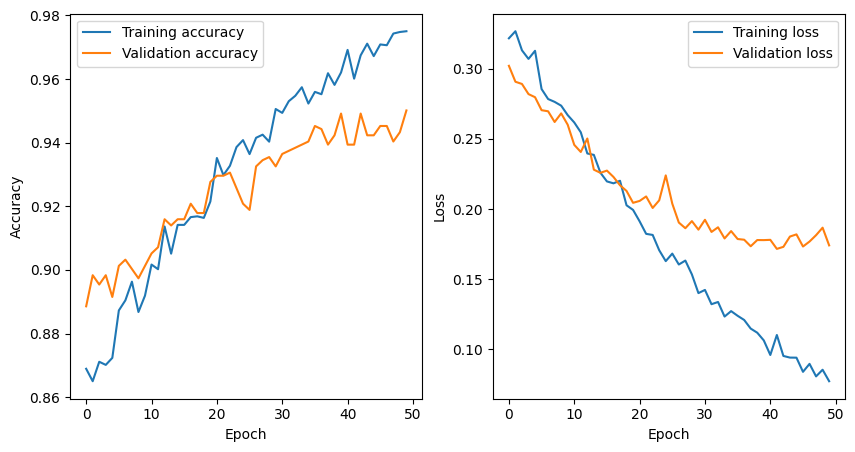

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

18/18 [==============================] - 0s 9ms/step
[[162  17  11]
 [ 28 110  51]
 [ 17  35 138]]


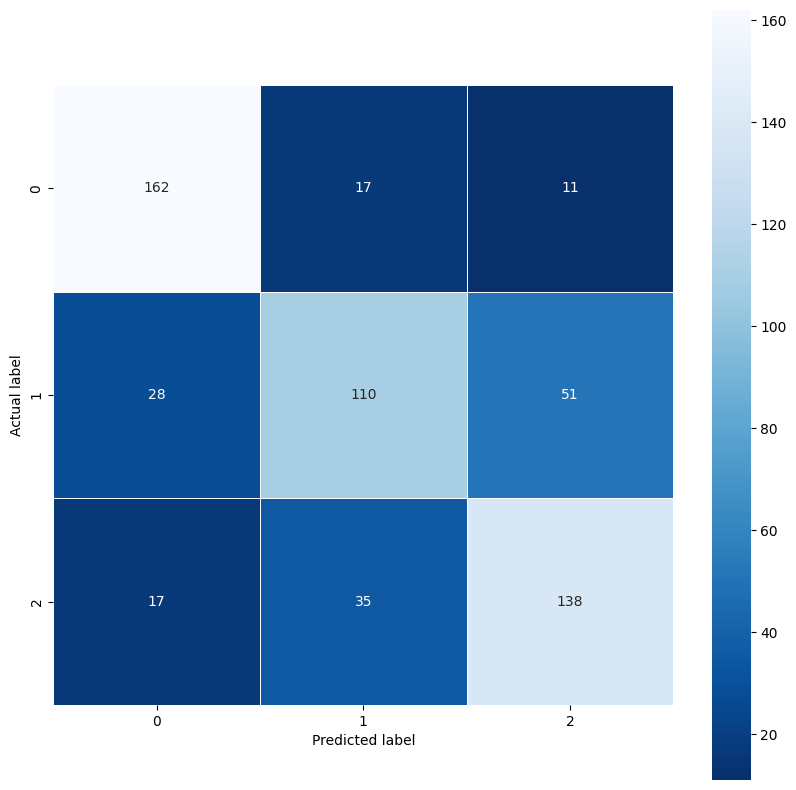

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(tf.keras.utils.to_categorical(y_test, nb_classes), axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix for the last model

plt.figure(figsize=(10, 10))

sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#Question 3


We intend to increase the accuracy using two solution:
1. Using 5 frames instead of 2 frames in previous question
2. To add a Conv3D in the model

1. Considering 5 frames 


In [11]:
nb_x_frames = 5 # number of frames

boxing_x_frame_samples = generate_x_frame_samples(boxing, nb_x_frames)
print("boxing_x_frame_samples shape: ", boxing_x_frame_samples.shape)

handclapping_x_frame_samples = generate_x_frame_samples(handclapping, nb_x_frames)
print("handclapping_x_frame_samples shape: ", handclapping_x_frame_samples.shape)

handwaving_x_frame_samples = generate_x_frame_samples(handwaving, nb_x_frames)
print("handwaving_x_frame_samples shape: ", handwaving_x_frame_samples.shape)

boxing_x_frame_samples shape:  (1600, 5, 120, 160)
handclapping_x_frame_samples shape:  (1584, 5, 120, 160)
handwaving_x_frame_samples shape:  (1600, 5, 120, 160)


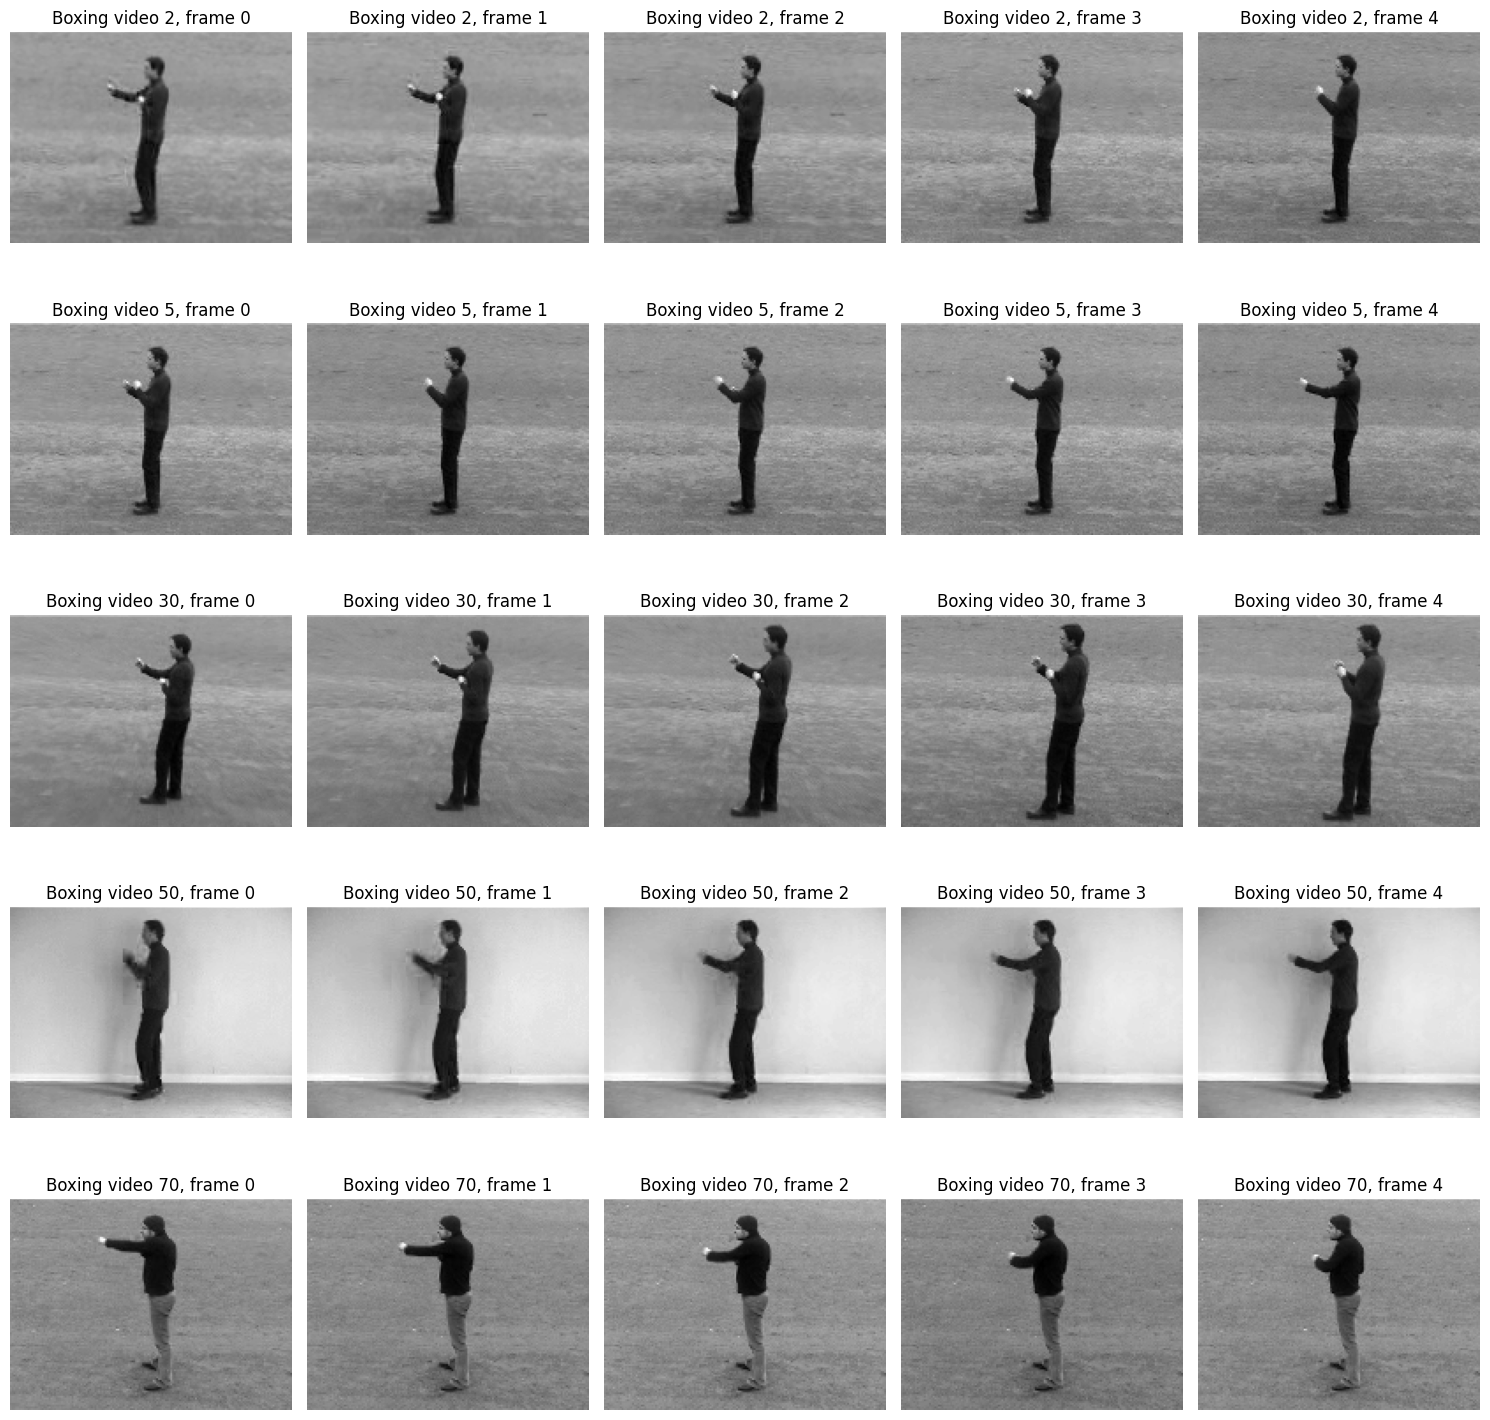

In [12]:
# Showimg 5 frames of selected videos
import matplotlib.pyplot as plt

selected_video = [2, 5, 30, 50, 70]

plt.figure(figsize=(15, 15))

for idx, i in enumerate(selected_video):
    boxing_x_frame_sample = boxing_x_frame_samples[i]  # Assuming `boxing_x_frame_samples` is a list or array containing frame samples

    for j in range(5):
        frame = boxing_x_frame_sample[j]  # Assuming each frame sample is a numpy array
        
        plt.subplot(5, 5, idx*5 + j + 1)
        plt.imshow(frame, cmap='gray')
        plt.title(f'Boxing video {i}, frame {j}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# data split
def split_train_test(data, train_test_ratio):
    train_size = int(len(data) * train_test_ratio)
    return data[:train_size], data[train_size:]

def create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio):
    train_boxing, test_boxing = split_train_test(boxing_x_frame_samples, train_test_ratio)
    train_handclapping, test_handclapping = split_train_test(handclapping_x_frame_samples, train_test_ratio)
    train_handwaving, test_handwaving = split_train_test(handwaving_x_frame_samples, train_test_ratio)

    X_train = np.concatenate((train_boxing, train_handclapping, train_handwaving))
    X_test = np.concatenate((test_boxing, test_handclapping, test_handwaving))

    y_train = np.array([0]*len(train_boxing) + [1]*len(train_handclapping) + [2]*len(train_handwaving))
    y_test = np.array([0]*len(test_boxing) + [1]*len(test_handclapping) + [2]*len(test_handwaving))

    # add an extra dimension for the grayscale channel
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

    # Shuffle the data
    idx = np.random.permutation(len(X_train))
    X_train, y_train = X_train[idx], y_train[idx]

    return X_train, X_test, y_train, y_test

train_test_ratio = 0.9


X_train, X_test, y_train, y_test = create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio)

print("\nX_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (4305, 5, 120, 160, 1)
X_test shape:  (479, 5, 120, 160, 1)
y_train shape:  (4305,)
y_test shape:  (479,)


In [14]:
optimizer_type = Adam(learning_rate=5e-5)  # optimisation algorithm: SGD stochastic gradient decent 
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.5  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 100  # maxmimum number of epochs to be iterated
batch_size = 50   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch
num_hidden_nodes = 32 # number of nodes in hidden fully connected layer
num_back_nodes = 32

nb_classes = 3

In [15]:
def conv_layer(input, filters=4, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'):
    conv = TimeDistributed( Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation='relu') )(input) 
    return TimeDistributed( Activation(activation) )(conv)

In [16]:
#STRUCTURE OF THE MODEL

input_shape = (5, 120, 160, 1)
inputs = Input(shape=input_shape)

conv1 = conv_layer(inputs, filters=4)
pool1 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv1)   # maxpool downsampled to 60x80x4

conv2 = conv_layer(pool1, filters=8)
pool2 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv2)   # maxpool downsampled to 30x40x8

conv3 = conv_layer(pool2, filters=16)
pool3 = TimeDistributed( MaxPooling2D((2, 2), strides=(2, 2)) )(conv3)   # maxpool downsampled to 15x20x16

flatten = TimeDistributed( Flatten() )(pool3)   

dense_01 = TimeDistributed(Dropout(dropout_ratio))(flatten)
dense_01 = TimeDistributed(Dense(num_hidden_nodes))(dense_01)
dense_01 = TimeDistributed(Activation('sigmoid'))(dense_01)

concat= Concatenate(axis=1)([ dense_01[:,0,:],dense_01[:,1,:] ])

dense_02 = Dense(nb_classes)(concat)
outputs = Activation('softmax')(dense_02)


* Compiling the network model *

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 120, 160  0           []                               
                                , 1)]                                                             
                                                                                                  
 time_distributed (TimeDistribu  (None, 5, 120, 160,  40         ['input_1[0][0]']                
 ted)                            4)                                                               
                                                                                                  
 time_distributed_1 (TimeDistri  (None, 5, 120, 160,  0          ['time_distributed[0][0]']       
 buted)                          4)                         

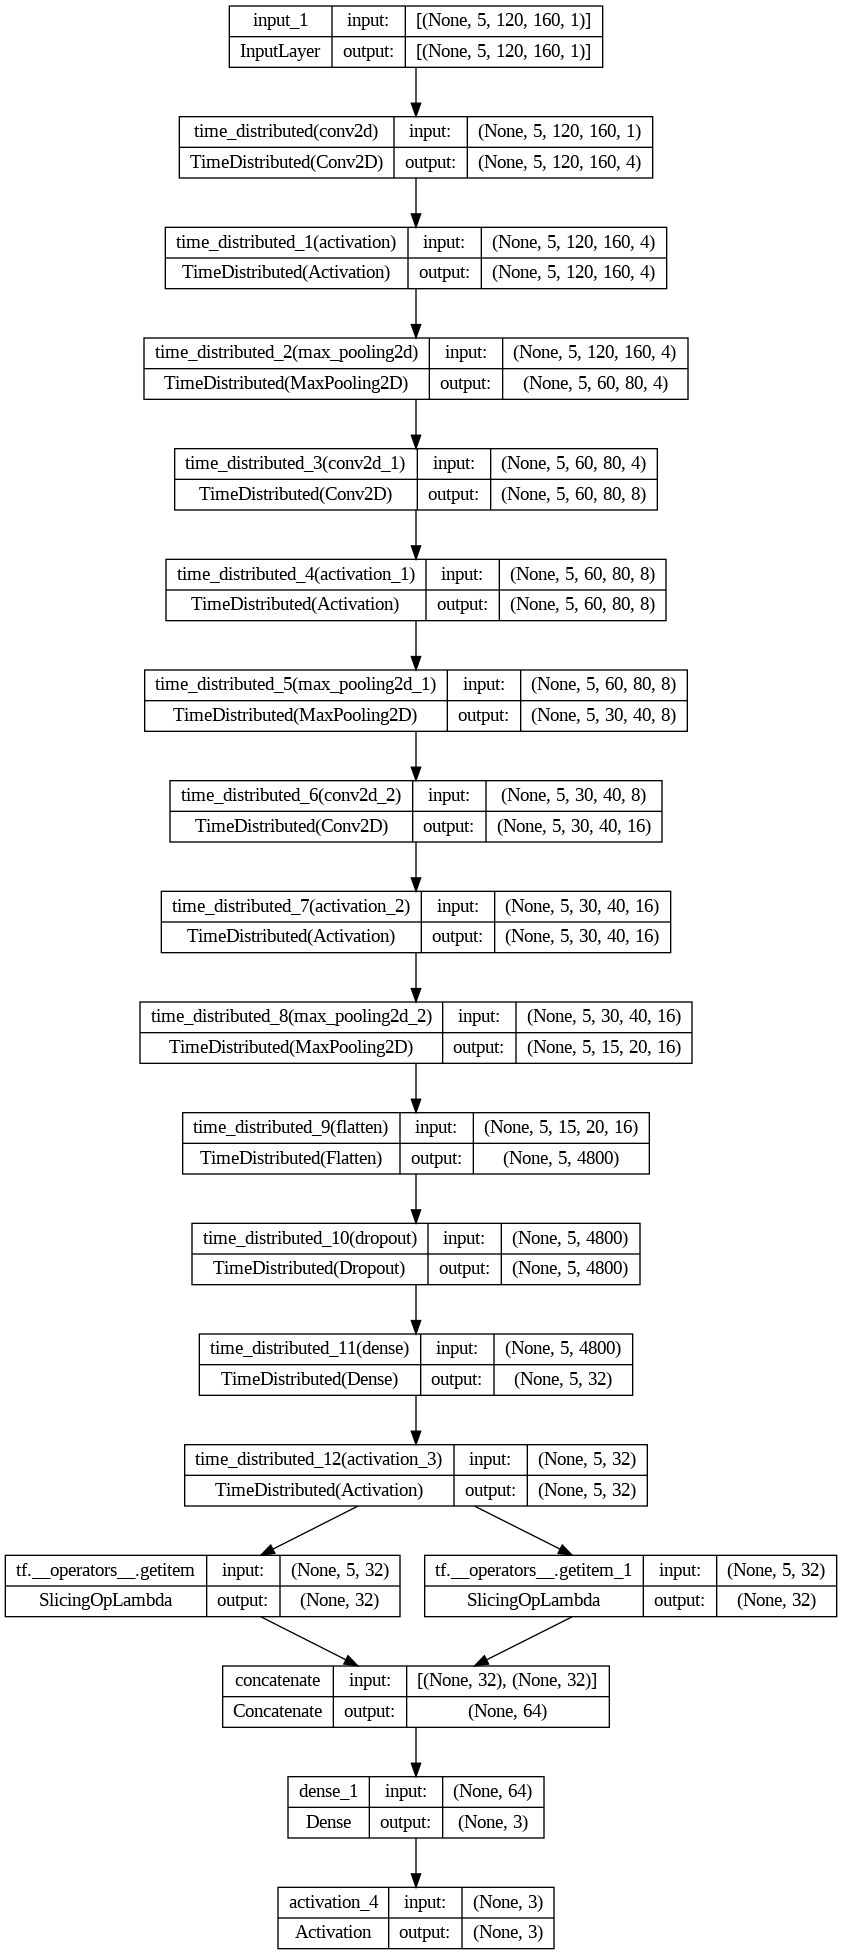

In [17]:
print()
print('* Compiling the network model *')
print()

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

# display a summary of the compiled neural network

print(model.summary())  
print()

# create and save a schematic image of the network architecture

from tensorflow.keras.utils import plot_model
from IPython.display import Image

print('Graphical schematic of the compiled network')
print()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(filename='model.png')

In [18]:
# Train your network from scratch at least 5 times and report the average and standard deviation of your test accuracies

evaluated_models = []

first_run = False
for i in range(1):
    print('Training iteration: ', i+1)
    print()
    tf.keras.backend.clear_session()

    if not first_run:
      del model
      first = False

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    history = model.fit(X_train, tf.keras.utils.to_categorical(y_train, nb_classes), batch_size=batch_size, epochs=max_epochs, validation_split=validtrain_split_ratio, shuffle=batch_shuffle)
    print()
    print('Training accuracy: ', history.history['categorical_accuracy'][-1])
    print('Validation accuracy: ', history.history['val_categorical_accuracy'][-1])
    print('Test accuracy: ', model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes))[1])
    print()
    evaluated_models.append(model.evaluate(X_test, tf.keras.utils.to_categorical(y_test, nb_classes)))

Training iteration:  1

Epoch 1/100
69/69 [==============================] - 14s 50ms/step - loss: 1.1855 - categorical_accuracy: 0.3322 - val_loss: 1.1195 - val_categorical_accuracy: 0.3473
Epoch 2/100
69/69 [==============================] - 2s 35ms/step - loss: 1.1462 - categorical_accuracy: 0.3252 - val_loss: 1.1007 - val_categorical_accuracy: 0.3531
Epoch 3/100
69/69 [==============================] - 3s 37ms/step - loss: 1.1250 - categorical_accuracy: 0.3470 - val_loss: 1.0919 - val_categorical_accuracy: 0.3589
Epoch 4/100
69/69 [==============================] - 3s 37ms/step - loss: 1.1084 - categorical_accuracy: 0.3444 - val_loss: 1.0961 - val_categorical_accuracy: 0.3368
Epoch 5/100
69/69 [==============================] - 3s 39ms/step - loss: 1.1062 - categorical_accuracy: 0.3400 - val_loss: 1.0960 - val_categorical_accuracy: 0.3577
Epoch 6/100
69/69 [==============================] - 3s 37ms/step - loss: 1.1049 - categorical_accuracy: 0.3415 - val_loss: 1.0989 - val_categori

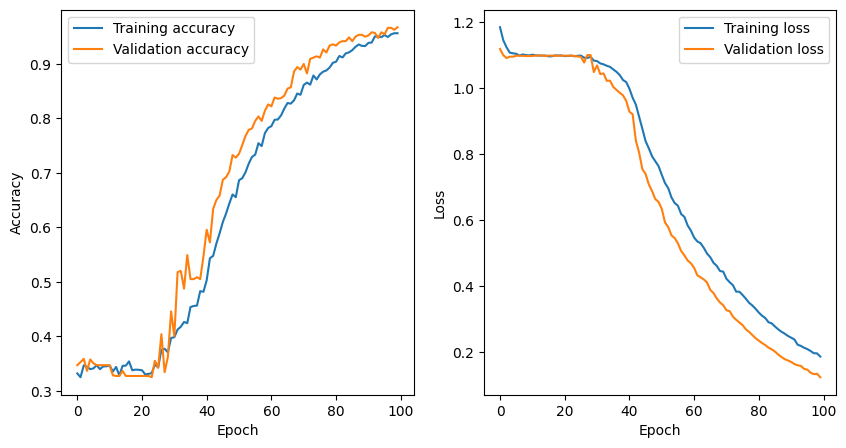

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. Add Conv3D to the model + 5 frame:

In [ ]:
nb_x_frames = 5 # number of frames

boxing_x_frame_samples = generate_x_frame_samples(boxing, nb_x_frames)
print("boxing_x_frame_samples shape: ", boxing_x_frame_samples.shape)

handclapping_x_frame_samples = generate_x_frame_samples(handclapping, nb_x_frames)
print("handclapping_x_frame_samples shape: ", handclapping_x_frame_samples.shape)

handwaving_x_frame_samples = generate_x_frame_samples(handwaving, nb_x_frames)
print("handwaving_x_frame_samples shape: ", handwaving_x_frame_samples.shape)

In [ ]:
# Showimg 5 frames of selected videos
import matplotlib.pyplot as plt

selected_video = [2, 5, 30, 50, 70]

plt.figure(figsize=(15, 15))

for idx, i in enumerate(selected_video):
    boxing_x_frame_sample = boxing_x_frame_samples[i]  # Assuming `boxing_x_frame_samples` is a list or array containing frame samples

    for j in range(5):
        frame = boxing_x_frame_sample[j]  # Assuming each frame sample is a numpy array
        
        plt.subplot(5, 5, idx*5 + j + 1)
        plt.imshow(frame, cmap='gray')
        plt.title(f'Boxing video {i}, frame {j}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# data split
def split_train_test(data, train_test_ratio):
    train_size = int(len(data) * train_test_ratio)
    return data[:train_size], data[train_size:]

def create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio):
    train_boxing, test_boxing = split_train_test(boxing_x_frame_samples, train_test_ratio)
    train_handclapping, test_handclapping = split_train_test(handclapping_x_frame_samples, train_test_ratio)
    train_handwaving, test_handwaving = split_train_test(handwaving_x_frame_samples, train_test_ratio)

    X_train = np.concatenate((train_boxing, train_handclapping, train_handwaving))
    X_test = np.concatenate((test_boxing, test_handclapping, test_handwaving))

    y_train = np.array([0]*len(train_boxing) + [1]*len(train_handclapping) + [2]*len(train_handwaving))
    y_test = np.array([0]*len(test_boxing) + [1]*len(test_handclapping) + [2]*len(test_handwaving))

    # add an extra dimension for the grayscale channel
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

    # Shuffle the data
    idx = np.random.permutation(len(X_train))
    X_train, y_train = X_train[idx], y_train[idx]

    return X_train, X_test, y_train, y_test

train_test_ratio = 0.9


X_train, X_test, y_train, y_test = create_train_test(boxing_x_frame_samples, handclapping_x_frame_samples, handwaving_x_frame_samples, train_test_ratio)

print("\nX_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

In [ ]:
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Activation, Dropout, Input, Concatenate

def conv_layer(input, filters=4, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'):
    conv = Conv3D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)(input)
    return Activation(activation)(conv)


In [ ]:

input_shape = (5, 120, 160, 1)
inputs = Input(shape=input_shape)

conv1 = conv_layer(inputs, filters=4)
pool1 = MaxPooling3D((2, 2, 2), strides=(2, 2, 2))(conv1)   # maxpool downsampled to 60x80x4

conv2 = conv_layer(pool1, filters=8)
pool2 = MaxPooling3D((2, 2, 2), strides=(2, 2, 2))(conv2)   # maxpool downsampled to 30x40x8

conv3 = conv_layer(pool2, filters=16)
pool3 = MaxPooling3D((2, 2, 2), strides=(2, 2, 2))(conv3)   # maxpool downsampled to 15x20x16

flatten = Flatten()(pool3)

dropout_ratio = 0.5
num_hidden_nodes = 64
dense_01 = Dropout(dropout_ratio)(flatten)
dense_01 = Dense(num_hidden_nodes)(dense_01)
dense_01 = Activation('sigmoid')(dense_01)

concat = Concatenate(axis=1)([dense_01[:, 0, :], dense_01[:, 1, :], dense_01[:, 2, :], dense_01[:, 3, :], dense_01[:, 4, :]])

nb_classes = 10
dense_02 = Dense(nb_classes)(concat)
outputs = Activation('softmax')(dense_02)

model = Model(inputs=inputs, outputs=outputs)